In [43]:
import pandas as pd

In [16]:
# listing 6.1 word-level one-hot encoding (toy example)

import numpy as np
# initial data: one entry per sample (in this example, a sample is a sentence, but it could 
# be an entire documnet) 
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
# build an index of all tokens in the data 
token_index = {}
for sample in samples:
    # tokenrizes the samples via the split method, in real life, you's also strip punctuation 
    # and special characters from the samples 
    for word in sample.split():
        if word not in token_index:
            # assign a unique index to each unique word, note that you don't attribute index 0
            # to anything 
            token_index[word] = len(token_index) + 1

# vectorize the samples, you'll only consider the first max_length words in each sample 
max_length = 10
results = np.zeros(shape=(len(samples), 
                          max_length,
                          max(token_index.values()) + 1)) 


In [17]:
token_index

{'The': 1,
 'cat': 2,
 'sat': 3,
 'on': 4,
 'the': 5,
 'mat.': 6,
 'dog': 7,
 'ate': 8,
 'my': 9,
 'homework.': 10}

In [18]:
results

array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

In [19]:
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]: 
        index = token_index.get(word)
        results[i, j, index] = 1.

In [20]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

In [49]:
# character-level one-hot encoding 
import string
samples = ['The cat sat on the mat.', 'The dog ate my homework.'] 
characters = string.printable


In [53]:
len(samples)

2

In [50]:
characters # all printable ASCII characters 

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [25]:
token_index = dict(zip(range(1, len(characters) + 1), characters))
max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1)) 
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] = 1.

In [47]:
pd.Series(token_index)

1       0
2       1
3       2
4       3
5       4
       ..
96     \t
97     \n
98     \r
99      

100     

Length: 100, dtype: object

In [70]:
results


array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [71]:
# listing 6.3 Using Keras for word-level one-hot encoding
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# Creates a tokenizer, configured to only take into account the 1,000 most common words
tokenizer = Tokenizer(num_words=1000)

# Builds the word index
tokenizer.fit_on_texts(samples) 

# Turns strings into lists of interger indices 
sequences = tokenizer.texts_to_sequences(samples)

# you could also directly get the one-hot binary representations. vectorization modes other than one-hot encoding
# are supported by this tokenizer 
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary') 

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index)) 
# seems like capital and small letters are considered the same using this method The == the 


Found 9 unique tokens.


In [72]:
# Listing 6.4 Word-level one-hot encoding with hashing trick (toy example)
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
# Stores the words as vectors of size 1,000. If you have close to 1,000 words (or more), 
# you’ll see many hash collisions, which will decrease the accuracy of this encoding method.
dimensionality = 1000
max_length = 10
results = np.zeros((len(samples), max_length, dimensionality)) 
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]: 
        # Hashes the word into a random integer index between 0 and 1,000 
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.
        

In [189]:
results.shape

(2, 10, 1000)

In [190]:
# instantiating an embedding layer 
from keras.layers import Embedding
# the embedding layer takes at least two arguments; the number of possible tokens (here, 1000: 1+max word index)
# and the dimensionality of the embeddings (here, 64)
embedding_layer = Embedding(1000, 64)

In [191]:
# 6.6, load the IMDB data for use with the embedding layer 
from keras.datasets import imdb 
from keras import preprocessing

# Number of words to consider as features
max_features = 10000
# Cuts off the text after this number of words (among the max_features most common words)
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data( 
     # Loads the data as lists of integers 
     num_words=max_features) 
    
# turn the list of intergers into a 2D integer tensor of shape (sample, maxlen) 
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)  
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)
                                               

In [192]:
# 6.7 using an embedding layer and classifier on the IMDB data 
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
# specifies the max input length to the embedding layer so you can later flatten the embedded inputs. 
# after the embedding layer, the activation have shape (samples, maxlen, 8)
model.add(Embedding(10000, 8, input_length=maxlen))

#Flattens the 3D tensor of embeddings into a 2D tensor of shape (samples, maxlen * 8)
model.add(Flatten())

# Adds the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc']) 
model.summary()

history = model.fit(x_train, 
                    y_train, 
                    epochs=10,
                    batch_size=32, 
                    validation_split=0.2)


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_3 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 1s 1ms/step - loss: 0.6838 - acc: 0.5759 - val_loss: 0.6017 - val_acc: 0.7080
Epoch 2/10
625/625 [==============================] - 1s 1ms/step - loss: 0.5527 - acc: 0.7510 - val_loss: 0.5173 - val_acc: 0.7342
Epoch 3/10
625/625 [==============================] - 1s 1ms/step - loss: 0.4575 - acc: 0.7915 - val_loss: 0.4955 - 

In [193]:
# 6.8 process the labels of the raw IMDB data 
import os
imdb_dir = '/home/ubuntu/deep_learning_with_python/dad/aclImdb/' 
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []


In [194]:
train_dir

'/home/ubuntu/deep_learning_with_python/dad/aclImdb/train'

In [195]:
# read txt and label into memory, with positive labeled as 1, negative labeled as 0 
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type) 
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname)) 
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0) 
            else:
                labels.append(1)
            

In [196]:
texts[:1]

["Jeff Lowell has written & directed 'Over Her Dead Body' poorly. The idea is first of all, is as stale as my jokes and the execution is just a cherry on the cake.<br /><br />Minus Eva Longoria Parker there is hardly anything appealing in this film. Eva looks great as ever and delivers a likable performance.<br /><br />Paul Rudd looks jaded and least interested. Lake Bell is a complete miscast. She looks manly and delivers a strictly average performance. Jason Biggs is wasted, so is Lindsay Sloane.<br /><br />I expected entertainment more from this film. Sadly, I didn't get entertained."]

In [197]:
labels[:1]

[0]

In [198]:
texts[20000:20001]

["Youth, sexuality, and the French countryside -- one of the more unique films you're ever going to see. If you can see it that is, no mean feat considering how hard it is to find copies of it (a combination of scarcity and censorship.) It's sometimes erotic, sometimes disgusting, and occasionally funny. A trifle boring also in the middle, but all in all you can't call yourself an aficionado of bizarre film until you've seen this one at least once."]

In [199]:
labels[20000:20001]

[1]

In [200]:
# 6.9, tokenizing the text of the raw IMDB data 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences 
import numpy as np

# Cuts off reviews after 100 words 
maxlen = 100  
# Trains on 200 samples
training_samples = 200 
# Validates on 10,000 samples
validation_samples = 10000 
# Considers only the top 10,000 words in the dataset
max_words = 10000

tokenizer = Tokenizer(num_words=max_words) 
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index)) 

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape) 
print('Shape of label tensor:', labels.shape)

# Splits the data into a training set and a validation set, but first shuffles the data, 
# because you’re starting with data in which samples are ordered (all negative first, then all positive)
indices = np.arange(data.shape[0]) 
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples] 
y_val = labels[training_samples: training_samples + validation_samples]


Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [201]:
# 6:10, parsing the GloVe word-embedding files 
glove_dir = "/home/ubuntu/deep_learning_with_python/dad/glove/"
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt')) 
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')  
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [202]:
type(embeddings_index)

dict

In [203]:
embeddings_index["the"] # dict can't be sliced, but you can get value based on key 

array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
       -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
        0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
       -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
        0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
       -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
        0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
        0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
       -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
       -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
       -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
       -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
       -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
       -1.2526  ,  0.071624,  0.70565 ,  0.49744 , 

In [204]:
# 6.11, preparing the GloVe word-embedding matrix 
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim)) 


In [205]:
embedding_matrix.shape

(10000, 100)

In [206]:
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word) 
        if embedding_vector is not None:
            # words not found in the embedding index will be all zeros 
            embedding_matrix[i] = embedding_vector 

In [207]:
type(word_index.items())

dict_items

In [208]:
embeddings_index.get("the") # vector for word "the"

array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
       -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
        0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
       -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
        0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
       -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
        0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
        0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
       -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
       -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
       -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
       -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
       -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
       -1.2526  ,  0.071624,  0.70565 ,  0.49744 , 

In [209]:
embedding_matrix[1] # store all the vector into embedding_matrix 

array([-0.038194  , -0.24487001,  0.72812003, -0.39961001,  0.083172  ,
        0.043953  , -0.39140999,  0.3344    , -0.57545   ,  0.087459  ,
        0.28786999, -0.06731   ,  0.30906001, -0.26383999, -0.13231   ,
       -0.20757   ,  0.33395001, -0.33848   , -0.31742999, -0.48335999,
        0.1464    , -0.37303999,  0.34577   ,  0.052041  ,  0.44946   ,
       -0.46970999,  0.02628   , -0.54154998, -0.15518001, -0.14106999,
       -0.039722  ,  0.28277001,  0.14393   ,  0.23464   , -0.31020999,
        0.086173  ,  0.20397   ,  0.52623999,  0.17163999, -0.082378  ,
       -0.71787   , -0.41531   ,  0.20334999, -0.12763   ,  0.41367   ,
        0.55186999,  0.57907999, -0.33476999, -0.36559001, -0.54856998,
       -0.062892  ,  0.26583999,  0.30204999,  0.99774998, -0.80480999,
       -3.0243001 ,  0.01254   , -0.36941999,  2.21670008,  0.72201002,
       -0.24978   ,  0.92136002,  0.034514  ,  0.46744999,  1.10790002,
       -0.19358   , -0.074575  ,  0.23353   , -0.052062  , -0.22

In [210]:
type(embedding_matrix) # and matrix is a nparray 

numpy.ndarray

In [211]:
# model definition 
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen)) 
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_4 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [212]:
# load pretrained word embedding into the embedding layer 
model.layers[0].set_weights([embedding_matrix])
# freeze the embedding layer 
model.layers[0].trainable = False

In [213]:
# 6.14, train and evaluation 
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['acc']) 

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')


Epoch 1/10
7/7 [==============================] - 1s 83ms/step - loss: 2.4069 - acc: 0.4815 - val_loss: 0.6924 - val_acc: 0.5094
Epoch 2/10
7/7 [==============================] - 0s 62ms/step - loss: 0.6087 - acc: 0.7163 - val_loss: 0.6925 - val_acc: 0.5150
Epoch 3/10
7/7 [==============================] - 0s 61ms/step - loss: 0.6087 - acc: 0.6180 - val_loss: 0.9411 - val_acc: 0.5044
Epoch 4/10
7/7 [==============================] - 0s 62ms/step - loss: 0.5467 - acc: 0.6318 - val_loss: 0.7127 - val_acc: 0.5475
Epoch 5/10
7/7 [==============================] - 0s 61ms/step - loss: 0.3732 - acc: 0.8706 - val_loss: 0.8093 - val_acc: 0.5365
Epoch 6/10
7/7 [==============================] - 0s 61ms/step - loss: 0.2297 - acc: 0.9325 - val_loss: 0.8923 - val_acc: 0.5147
Epoch 7/10
7/7 [==============================] - 0s 62ms/step - loss: 0.1376 - acc: 0.9582 - val_loss: 0.9454 - val_acc: 0.5275
Epoch 8/10
7/7 [==============================] - 0s 62ms/step - loss: 0.0849 - acc: 0.9950 - val

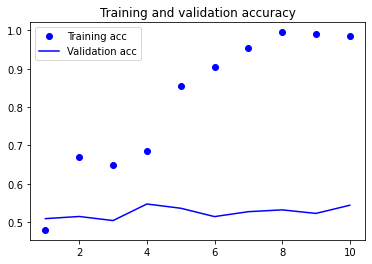

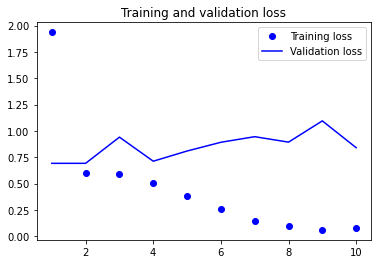

In [214]:
# plotting the result 
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()

plt.show()

the model quickly starts overfitting, validation accuracy has high variance for the same reason, but it seems to reach the high 50s. 

In [215]:
# 6.16 training the same model without pretrained word embedding 
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen)) 
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# skipped the two lines of code below to load pretrained weigth 
#model.layers[0].set_weights([embedding_matrix])
#model.layers[0].trainable = False

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['acc']) 
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
flatten_5 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 1s 85ms/step - loss: 0.6941 - acc: 0.4924 - val_loss: 0.6927 - val_acc: 0.5049
Epoch 2/10
7/7 [==============================] - 0s 65ms/step - loss: 0.5228 - acc: 0.9931 - val_loss: 0.6934 - 

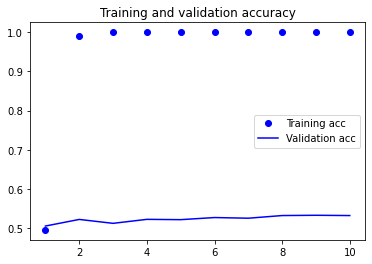

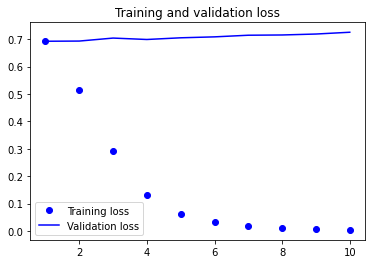

In [216]:
# plot out result 
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()

plt.show()

validation accuracy stalls in the low 50s. so in this case, pretrained word embeddings outperform jointly learned embeddings. 

In [217]:
# tokenizing the data of test set 
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type) 
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname)) 
            texts.append(f.read())
            f.close()
        if label_type == 'neg':
            labels.append(0) 
        else:
            labels.append(1)

sequences = tokenizer.texts_to_sequences(texts) 
x_test = pad_sequences(sequences, maxlen=maxlen) 
y_test = np.asarray(labels)


In [218]:
# evaluting the model on the test set 
model.load_weights('pre_trained_glove_model.h5') 
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.8322 - acc: 0.5556


[0.8322487473487854, 0.5555599927902222]

test accuracy of 56%, working with a just handful of training samples is difficult. 

In [226]:
from platform import python_version

print(python_version()) # this version of python is not be compatible with SimpleRNN 

3.9.6
